In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [0]:
feature_df = pd.read_csv('gisette_train.data', header=None, delimiter=r"\s+")
label_df = pd.read_csv('gisette_train.labels', header=None)

feature_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,0,0,983,0,995,0,983,0,0,983,0,0,0,0,0,983,0,0,0,0,0,0,0,0,0,0,0,0,991,983,...,0,0,0,513,0,533,811,0,0,0,983,0,0,0,0,0,983,991,0,0,0,983,0,0,0,0,0,0,0,0,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,0,0,0,0,584,0,0,0,0,0,0,0,0,0,0,983,0,0,0,0,0,0,0,0,0,898,0,0,0,0,...,0,0,0,932,0,0,764,828,0,0,0,983,0,0,0,0,0,991,0,0,0,0,0,0,0,0,0,0,0,0,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,983,0,995,983,976,0,0,0,0,0,0,0,0,983,0,742,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,991,0,0,991,0,0,0,0,0,0,0,0,0,0,584,0,0,0,0,0,940,0,0,0,0,0,616,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,0,0,983,0,991,816,983,0,0,0,0,0,0,0,0,685,0,767,0,0,0,0,0,0,991,0,0,0,0,0,...,0,0,0,748,0,0,729,0,991,0,808,0,0,0,0,0,0,991,0,874,0,859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,0,0,0,0,972,0,0,0,0,0,0,0,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675,780,0,0,0,0,983,0,0,0,0,0,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,956,0,0,0,0,0,0,0,0,0,0,964,0,0,0,0,0,0,0,0,804,0,0,0,780,742,...,0,0,0,995,0,0,995,0,0,0,0,0,0,0,0,0,691,0,0,0,940,0,785,0,0,0,0,987,0,0,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,630,0,0,0,719,0,0,552,0,0,0,0,911,0,0,0,0,0,0,0,0,0,0,0,991,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,0,0,991,623,0,0,0,0,0,0,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,0,0,991,596,0,960,968,0,0,0,987,0,641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,572,0,0,0,892,0,0,0,0,0,0,0,511,0,564,0,0,0,0,0,0,0,0,0,983,0,0,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,729,501,504,0,0,0,0,0,821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,890,0,0,0,0,0,0,0,781,0,0,0,995,0,0,0,484,0,573,0,0,0,976,0,0,0,0,0,0,690,0,0,0,0,0


In [0]:
y = label_df[0]

In [0]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(feature_df)
x

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [0]:
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components=2)
principalComponenets_gisette = pca_gisette.fit_transform(x)

In [0]:
pca_gisette.explained_variance_ratio_

array([0.02883488, 0.02258951])

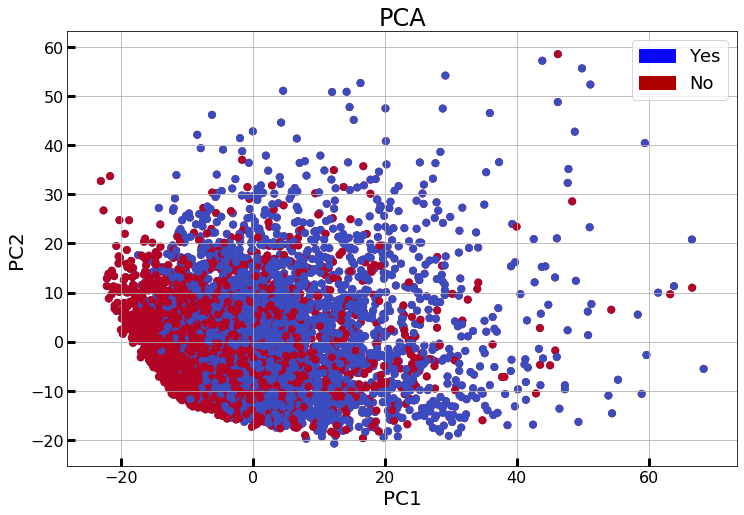

In [0]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, figsize = (12,8))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Yes')
red_patch = mpatches.Patch(color='#AF0000', label='No')

ax.scatter(principalComponenets_gisette[:,0], principalComponenets_gisette[:,1], c=(y == -1), cmap='coolwarm', label='Yes', linewidths=2)
ax.scatter(principalComponenets_gisette[:,0], principalComponenets_gisette[:,1], c=(y == 1), cmap='coolwarm', label='No', linewidths=2)
ax.set_title('PCA', fontsize=24)
ax.set_xlabel("PC1", fontsize = 20)
ax.set_ylabel("PC2", fontsize = 20)
ax.tick_params(axis='y', labelcolor="k", length=8, width=3, direction = "in", labelsize = 16)
ax.tick_params(axis='x', labelcolor="k", length=8, width=3, direction = "in", labelsize = 16)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch], fontsize = 18)